In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Pre-process the data

## Data from data_with_labels_forward.csv are spoilt after epoch 600

In [2]:
df0 = pd.read_csv('data_with_labels_forward.csv')
df0 = df0.drop(['Timestamp'], axis=1)
df0 = df0[0:600]
df0.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.752886,-0.416104,-0.237704,0.447382,0.517248,-0.316295,0.453605,-0.650616,-0.507395,0.294262,0.322177,-0.740903,0
1,0.757055,-0.408983,-0.237987,0.446774,0.507800,-0.308021,0.467234,-0.652381,-0.506942,0.297374,0.319236,-0.741220,0
2,0.756517,-0.411024,-0.229891,0.450038,0.519034,-0.302122,0.478482,-0.637972,-0.504627,0.303594,0.313305,-0.742806,0
3,0.751689,-0.419989,-0.237990,0.445797,0.514019,-0.306143,0.493954,-0.628415,-0.503852,0.309046,0.330900,-0.733370,0
4,0.744534,-0.428553,-0.237795,0.449564,0.507717,-0.322238,0.494073,-0.625285,-0.501926,0.309918,0.326013,-0.736569,0


## The rest are okay

In [3]:
df1 = pd.read_csv('data_with_labels_left.csv')
df1 = df1.drop(['Timestamp'], axis=1)
df1.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.750367,-0.648955,0.042628,0.104173,0.522966,-0.711594,0.456799,-0.091474,-0.175881,0.289614,0.573328,-0.743892,1
1,0.749800,-0.650357,0.038996,0.100809,0.520984,-0.712642,0.457674,-0.090251,-0.176987,0.288468,0.572375,-0.744643,1
2,0.753487,-0.646044,0.038321,0.100267,0.517574,-0.715469,0.457153,-0.090798,-0.179893,0.286297,0.568916,-0.747430,1
3,0.749833,-0.650067,0.040890,0.101768,0.523598,-0.712786,0.453796,-0.092161,-0.181900,0.284410,0.565983,-0.749888,1
4,0.752042,-0.647520,0.039814,0.101045,0.516340,-0.717222,0.455593,-0.091226,-0.180423,0.293457,0.574655,-0.740099,1


In [4]:
df2 = pd.read_csv('data_with_labels_right.csv')
df2 = df2.drop(['Timestamp'], axis=1)
df2.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,-0.754631,0.607717,0.198710,-0.136428,-0.310121,0.513591,-0.506182,0.616822,-0.150727,0.070215,0.610858,-0.771977,2
1,-0.757188,0.604833,0.195120,-0.139340,-0.309459,0.513939,-0.509339,0.614253,-0.147718,0.075778,0.604328,-0.777089,2
2,-0.762033,0.598859,0.196360,-0.136963,-0.304128,0.518360,-0.507504,0.614888,-0.146627,0.079953,0.618757,-0.765565,2
3,-0.757815,0.604509,0.196225,-0.136560,-0.308633,0.513716,-0.508799,0.615298,-0.154680,0.077728,0.614858,-0.767206,2
4,-0.758693,0.602956,0.199975,-0.132215,-0.308036,0.514994,-0.511494,0.612501,-0.159124,0.077061,0.616753,-0.764840,2


In [5]:
df3 = pd.read_csv('data_with_labels_backward.csv')
df3 = df3.drop(['Timestamp'], axis=1)
df3.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.023912,-0.019588,-0.692620,0.718296,-0.173281,0.329696,-0.787138,0.488427,0.758468,-0.647141,0.052838,-0.000358,3
1,0.022385,-0.021215,-0.696411,0.714849,-0.176642,0.326846,-0.785567,0.491573,0.751291,-0.655200,0.055977,0.001204,3
2,0.024302,-0.019183,-0.699380,0.711923,-0.175949,0.327179,-0.785971,0.490799,0.758059,-0.647314,0.054382,-0.002378,3
3,0.024928,-0.019176,-0.695201,0.715787,-0.174310,0.328257,-0.787097,0.489200,0.756482,-0.648626,0.062228,0.000697,3
4,0.026328,-0.014902,-0.687877,0.722879,-0.172943,0.329113,-0.790119,0.484018,0.759699,-0.644798,0.061080,-0.002525,3


In [6]:
df4 = pd.read_csv('data_with_labels_proper.csv')
df4 = df4.drop(['Timestamp'], axis=1)
df4.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.430204,-0.415639,0.581813,-0.548180,0.347383,-0.366078,-0.611935,0.606211,-0.150915,0.023693,-0.663352,0.730415,4
1,0.433612,-0.411523,0.582412,-0.548003,0.348035,-0.366469,-0.611681,0.605854,-0.147620,0.025478,-0.666366,0.728290,4
2,0.432539,-0.411657,0.585990,-0.544949,0.349273,-0.365591,-0.603104,0.614205,-0.149073,0.023293,-0.664677,0.729601,4
3,0.433243,-0.410586,0.583593,-0.547768,0.352002,-0.364056,-0.605835,0.611085,-0.142785,0.025146,-0.664992,0.730479,4
4,0.434384,-0.409321,0.581106,-0.550206,0.346908,-0.370020,-0.614501,0.601517,-0.143758,0.022178,-0.667295,0.728151,4


In [7]:
df5 = pd.read_csv('data_with_labels_unknown.csv')
df5 = df5.drop(['Timestamp'], axis=1)
df5.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.919277,0.030660,0.003915,0.388075,0.994306,0.039714,0.060256,-0.052719,0.799528,-0.154516,-0.086804,0.570950,5
1,0.918756,0.030781,0.005564,0.389276,0.994334,0.037862,0.060720,-0.052983,0.800059,-0.151663,-0.084596,0.571301,5
2,0.918650,0.026354,0.008048,0.389810,0.994543,0.039644,0.056157,-0.052786,0.800969,-0.147603,-0.086595,0.570785,5
3,0.918486,0.031728,0.008792,0.389776,0.994708,0.037088,0.054867,-0.052870,0.799869,-0.154400,-0.086976,0.570463,5
4,0.918494,0.030398,0.005556,0.389923,0.994538,0.038014,0.057256,-0.052886,0.800301,-0.154396,-0.085758,0.570056,5


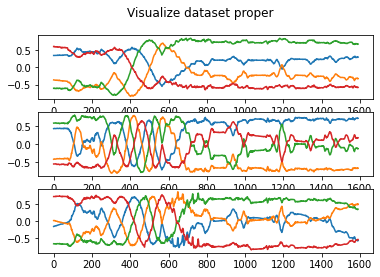

In [15]:
fig, axs = plt.subplots(3)
fig.suptitle('Visualize dataset proper')

axs[0].plot(df4['q0_back_low'])
axs[0].plot(df4['q1_back_low'])
axs[0].plot(df4['q2_back_low'])
axs[0].plot(df4['q3_back_low'])

axs[1].plot(df4['q0_back_mid'])
axs[1].plot(df4['q1_back_mid'])
axs[1].plot(df4['q2_back_mid'])
axs[1].plot(df4['q3_back_mid'])

axs[2].plot(df4['q0_neck'])
axs[2].plot(df4['q1_neck'])
axs[2].plot(df4['q2_neck'])
axs[2].plot(df4['q3_neck'])


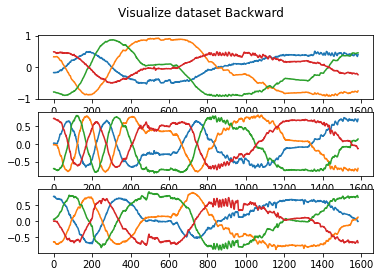

In [303]:
fig, axs = plt.subplots(3)
fig.suptitle('Visualize dataset Backward')

axs[0].plot(df3['q0_back_low'])
axs[0].plot(df3['q1_back_low'])
axs[0].plot(df3['q2_back_low'])
axs[0].plot(df3['q3_back_low'])

axs[1].plot(df3['q0_back_mid'])
axs[1].plot(df3['q1_back_mid'])
axs[1].plot(df3['q2_back_mid'])
axs[1].plot(df3['q3_back_mid'])

axs[2].plot(df3['q0_neck'])
axs[2].plot(df3['q1_neck'])
axs[2].plot(df3['q2_neck'])
axs[2].plot(df3['q3_neck'])


### From here we can see that a range from [400:900] is suitable to be used as a base quat
### Compute the base quats

In [8]:
base_df=df4[900:1400]
base_quat = base_df.mean(axis = 0)
base_quat_back_mid = np.array(base_quat[0: 4])
base_quat_back_low = np.array(base_quat[4: 8])
base_quat_neck = np.array(base_quat[8: 12])

In [9]:
df = pd.concat([df0, df1, df2, df3, df4, df5])
df.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.752886,-0.416104,-0.237704,0.447382,0.517248,-0.316295,0.453605,-0.650616,-0.507395,0.294262,0.322177,-0.740903,0
1,0.757055,-0.408983,-0.237987,0.446774,0.507800,-0.308021,0.467234,-0.652381,-0.506942,0.297374,0.319236,-0.741220,0
2,0.756517,-0.411024,-0.229891,0.450038,0.519034,-0.302122,0.478482,-0.637972,-0.504627,0.303594,0.313305,-0.742806,0
3,0.751689,-0.419989,-0.237990,0.445797,0.514019,-0.306143,0.493954,-0.628415,-0.503852,0.309046,0.330900,-0.733370,0
4,0.744534,-0.428553,-0.237795,0.449564,0.507717,-0.322238,0.494073,-0.625285,-0.501926,0.309918,0.326013,-0.736569,0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

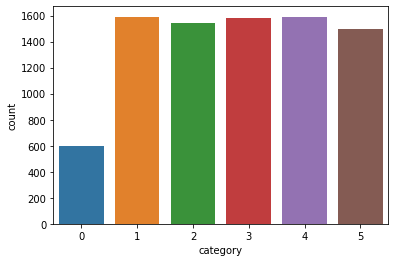

In [10]:
sns.countplot(df['category'])
plt.xticks()

## Offset the whole dataset based on the base quats

In [11]:
class NP_Q:
    
    """
        Set of Numpy based functions to work with quaternions
    """
    
    @classmethod
    def norm(cls, q):
        return np.sqrt(np.dot(q,q))
    
    @classmethod
    def mult(cls, p,q):
        s = p[0]*q[0] - np.dot(p[1:], q[1:])
        v = p[0]*q[1:] + q[0]*p[1:] + np.cross(p[1:], q[1:])
        return np.append([s], v)
    
    @classmethod
    def conjugate(cls, q):
        return np.array([q[0], -q[1], -q[2], -q[3]])
    
    @classmethod
    def inverse(cls, q):
        return cls.conjugate(q) / np.dot(q,q)
    
    @classmethod
    def log(cls, q):
        v = q[1:]
        a = q[0]
        x = a/cls.norm(q)
        real_part = np.log(cls.norm(q))
        vec_part = v/np.linalg.norm(v, axis=-1) * np.arccos(x)
        return np.append([real_part], vec_part)
    
    @classmethod
    def geodesic_dist(cls, q1, q2):
        x = cls.mult(cls.inverse(q1), q2)
        print(x)
        return cls.norm(cls.log(x))
    
    @classmethod
    def angle_dist(cls, q1,q2):
        x = 2*(np.dot(q1,q2))**2 - 1
        return np.arccos(x) / np.pi * 180
    
    @classmethod
    def quad_diff(cls, q1, q2):
        x = cls.mult(cls.inverse(q1), q2)
        return x

In [12]:
# q1 = np.array([1, 0, 0, 0])
# q2 = np.array([0, 1, 0, 0])
#base_quat_neck = np.array([0.25,1,1,1])

df_back_mid = df[['q0_back_mid', 'q1_back_mid', 'q2_back_mid', 'q3_back_mid']]
df_back_low = df[['q0_back_low', 'q1_back_low', 'q2_back_low', 'q3_back_low']]
df_neck = df[['q0_neck', 'q1_neck', 'q2_neck', 'q3_neck']]
#print(NP_Q.quad_diff(base_quat_back_mid, df_back_mid.iloc[0]))
for i, row in df_back_mid.iterrows():
    value = NP_Q.quad_diff(base_quat_back_mid, df_back_mid.iloc[i])
    df_back_mid.iloc[i] = value
for i, row in df_back_low.iterrows():
    df_back_low.iloc[i] = NP_Q.quad_diff(base_quat_back_low, df_back_low.iloc[i])
for i, row in df_neck.iterrows():
    df_neck.iloc[i] = NP_Q.quad_diff(base_quat_neck, df_neck.iloc[i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-12-75901c02d0c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back_mid.iloc[i] = value
<ipython-input-12-75901c02d0c4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back_low.iloc[i] = NP_Q.quad_diff(base_quat_back_low, df_back_low.iloc[i])
<ipython

In [13]:
df_back_mid.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid
0,-0.476977,-1.188891,0.210298,0.618977
1,-0.465800,-1.191657,0.210631,0.622067
2,-0.467880,-1.194941,0.217438,0.611775
3,-0.482190,-1.188247,0.207141,0.617517
4,-0.497387,-1.182707,0.211246,0.614435


In [14]:
df = pd.concat([df_back_mid, df_back_low, df_neck, df['category']], axis=1)
df

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,-0.476977,-1.188891,0.210298,0.618977,0.585128,0.478656,-0.593774,0.429252,0.958625,-0.114167,0.045043,0.545586,0
1,-0.465800,-1.191657,0.210631,0.622067,0.598141,0.466557,-0.586928,0.434027,0.957209,-0.115459,0.049047,0.547412,0
2,-0.467880,-1.194941,0.217438,0.611775,0.592390,0.449633,-0.599937,0.441894,0.953533,-0.117645,0.056506,0.552615,0
3,-0.482190,-1.188247,0.207141,0.617517,0.601478,0.433947,-0.606965,0.435922,0.955528,-0.135025,0.042917,0.546344,0
4,-0.497387,-1.182707,0.211246,0.614435,0.606172,0.436422,-0.612299,0.418995,0.953337,-0.132172,0.046964,0.550628,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.514609,-0.359766,0.490666,-0.601342,0.306632,-0.410231,-0.677364,0.524889,-0.052688,-0.078171,-0.978431,-0.175310,5
1492,0.524522,-0.359345,0.496885,-0.587780,0.298860,-0.410155,-0.675112,0.532520,-0.051484,-0.078016,-0.978083,-0.176976,5
1493,0.563248,-0.363010,0.456626,-0.582609,0.295273,-0.389449,-0.663345,0.563704,-0.051306,-0.077809,-0.977568,-0.180152,5
1494,0.616517,-0.387250,0.360500,-0.580197,0.299515,-0.354966,-0.658705,0.589099,-0.051643,-0.077173,-0.977783,-0.178968,5


# Tree-based model

## Train-test split

In [15]:
y = df['category']
X = df.drop(['category'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=30)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

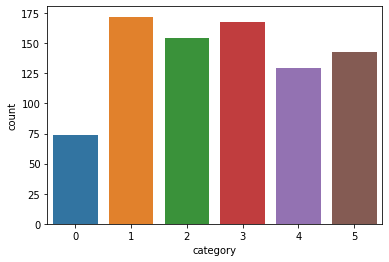

In [16]:
sns.countplot(y_train)
plt.xticks()

## Find a smallest max_depth to avoid overfitting

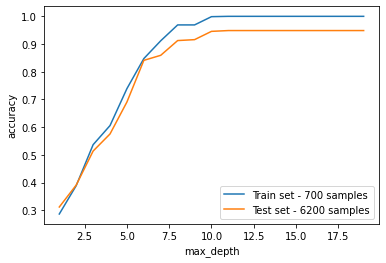

In [18]:
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

train_accuracy_scores = []
test_accuracy_scores = []

for max_depth in range(1, 20):
    clf = tree.DecisionTreeClassifier(criterion='entropy',splitter = 'random', max_depth = max_depth, random_state = 42)
    clf = clf.fit(X_train, y_train)
    
    rfc_predict = clf.predict(X_train)# check performance
    train_acc = accuracy_score(y_train, rfc_predict)
    train_accuracy_scores.append(train_acc)
    #print('Train accuracy score:', train_acc)
    
    rfc_predict = clf.predict(X_test)# check performance
    test_acc = accuracy_score(y_test, rfc_predict)
    test_accuracy_scores.append(test_acc)
    #print('Test accuracy score:', test_acc)

import matplotlib.pyplot as plt
plt.plot(np.arange(1, 20, 1), np.array(train_accuracy_scores), label='Train set - 700 samples')
plt.plot(np.arange(1, 20, 1), np.array(test_accuracy_scores), label='Test set - 6200 samples')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(loc='lower right')

In [56]:
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

rfc = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', random_state = 42, max_depth = )

# fit the predictor and target
history = rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
#print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
#print('F1 score:',f1_score(y_test, rfc_predict, average='weighted'))
# print('Precision:',precision_score(y_test, rfc_predict))
# print('Recall:',recall_score(y_test, rfc_predict))

Accuracy score: 0.727817993795243


## Final decision tree model

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter = 'random', max_depth = 7, random_state = 42)
clf = clf.fit(X_train, y_train)
rfc_predict = clf.predict(X_train)# check performance
print('Train accuracy score:',accuracy_score(y_train, rfc_predict))
rfc_predict = clf.predict(X_test)# check performance
print('Test accuracy score:',accuracy_score(y_test, rfc_predict))

Train accuracy score: 0.9119047619047619
Test accuracy score: 0.8594473092688086


## Generate one-hot encoding for training neural networks

In [20]:
y = df['category']
X = df.drop(['category'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [21]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

values = array(y_train)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
y_train = pd.DataFrame(onehot_encoded)
print(y_train)

        0    1    2    3    4    5
0     0.0  0.0  0.0  0.0  0.0  1.0
1     0.0  0.0  0.0  0.0  0.0  1.0
2     0.0  0.0  0.0  1.0  0.0  0.0
3     0.0  0.0  0.0  1.0  0.0  0.0
4     0.0  0.0  0.0  1.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...
5877  0.0  0.0  0.0  1.0  0.0  0.0
5878  0.0  1.0  0.0  0.0  0.0  0.0
5879  1.0  0.0  0.0  0.0  0.0  0.0
5880  0.0  0.0  0.0  1.0  0.0  0.0
5881  0.0  0.0  0.0  0.0  1.0  0.0

[5882 rows x 6 columns]


In [22]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

values = array(y_test)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
y_test = pd.DataFrame(onehot_encoded)
print(y_test)

        0    1    2    3    4    5
0     0.0  0.0  0.0  0.0  0.0  1.0
1     0.0  0.0  0.0  0.0  0.0  1.0
2     0.0  0.0  0.0  1.0  0.0  0.0
3     0.0  1.0  0.0  0.0  0.0  0.0
4     0.0  1.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...
2516  0.0  0.0  0.0  1.0  0.0  0.0
2517  0.0  0.0  1.0  0.0  0.0  0.0
2518  0.0  0.0  1.0  0.0  0.0  0.0
2519  0.0  0.0  0.0  0.0  0.0  1.0
2520  0.0  1.0  0.0  0.0  0.0  0.0

[2521 rows x 6 columns]


# Neural Network

Accuracy: 0.6429785490036011
Validation Accuracy: 0.6318920850753784
Loss: 0.9206661581993103
Validation Loss: 0.9271193146705627


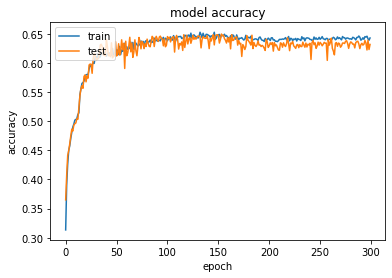

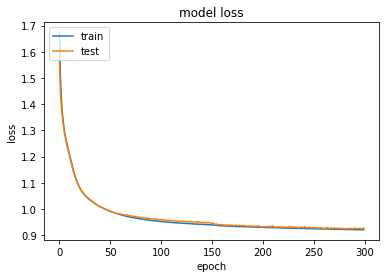

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()

# First hidden layer
model.add(Dense(3, input_shape = (12, ), activation = 'relu'))

# Finally our output with softmax activation
model.add(Dense(6, activation = 'softmax'))

# Create a Stochastic Gradient Descent optimizer with a learn rate of 0.01
# and a decay of 1e-6, which is the amount that the learn rate is decayed
# by periodically. Finally there's a momentum of 0.9 which helps control
# "overshoot"
sgd  = SGD(learning_rate = 0.05, decay = 1e-6, momentum = 0.1)

# Now compile the model. We use a "categorical cross entropy" loss function
# which is more sophisticated than the simple mean-squared loss
# function in the lecture and well suited for classification problems.
# We will look at it again at a later lecture.
model.compile(loss = 'categorical_crossentropy', optimizer = sgd,
             metrics = 'accuracy')
history = model.fit(x = X_train, y = y_train, shuffle = True, 
          epochs = 300, validation_data = (X_test, y_test), verbose=False)

# print("Done testing. Now evaluating:")

# loss, acc = model.evaluate(x = test_x, y = test_y)
# print("Final loss is %3.2f, accuracy is %3.2f." % (loss, acc))

print("Accuracy: " + str(history.history['accuracy'][-1]))
print("Validation Accuracy: " + str(history.history['val_accuracy'][-1]))
print("Loss: " + str(history.history['loss'][-1]))
print("Validation Loss: " + str(history.history['val_loss'][-1]))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save and load the model

In [290]:
model.save('model_nn_5')

INFO:tensorflow:Assets written to: model_nn_5\assets


## Load the model and make prediction

In [176]:
sample = [-0.06437778, -0.9050758, 0.42034901, -0.95735092,  0.03532022,  0.28676069,
    0.66192558, -0.56875487,  0.48823398, -0.49501592, -0.52682804,  0.69094968]
model_input = np.array(sample).reshape(1, -1)
loaded_model.predict_proba(model_input)

array([[0., 0., 0., 0., 1.]])

In [292]:
new_model = tf.keras.models.load_model('model_nn_5')
# Check its architecture
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 3)                 39        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 20        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [298]:
new_model.predict([X_train[:2]])

array([[3.7388185e-01, 1.2237456e-02, 1.1824635e-25, 6.1387616e-01,
        4.5560678e-06],
       [3.0594801e-03, 2.5249016e-03, 9.4822896e-01, 4.6158127e-02,
        2.8456550e-05]], dtype=float32)

In [300]:
new_model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 686us/step - loss: 0.5290 - accuracy: 0.8326


[0.5289678573608398, 0.8326097726821899]

# Train with a more customized neural network

Accuracy: 0.9767085909843445
Validation Accuracy: 0.97381991147995
Loss: 0.09878800809383392
Validation Loss: 0.1345689296722412


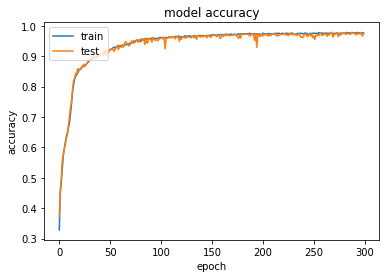

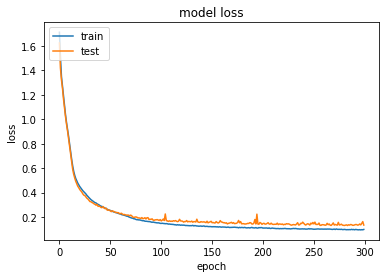

In [25]:
from keras.models import Model
from keras.layers import Dense, Input, Concatenate, Lambda
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import SGD

inputTensor = Input((12,))

group1 = Lambda(lambda x: x[:,:4], output_shape=((2,)))(inputTensor)
group2 = Lambda(lambda x: x[:,4:8], output_shape=((2,)))(inputTensor)
group3 = Lambda(lambda x: x[:,8:12], output_shape=((2,)))(inputTensor)

#second layer in your image
group1 = Dense(4, activation = 'relu')(group1)
group2 = Dense(4, activation = 'relu')(group2)
group3 = Dense(4, activation = 'relu')(group3)  

group1_2 = Dense(3, activation = 'relu')(group1)
group2_2 = Dense(3, activation = 'relu')(group2)
group3_3 = Dense(3, activation = 'relu')(group3)  

outputTensor = Concatenate()([group1_2,group2_2,group3_3])

outputTensor = Dense(6, activation = 'softmax')(outputTensor)

#create the model:
model = Model(inputTensor,outputTensor)

# Create a Stochastic Gradient Descent optimizer with a learn rate of 0.01
# and a decay of 1e-6, which is the amount that the learn rate is decayed
# by periodically. Finally there's a momentum of 0.9 which helps control
# "overshoot"
sgd  = SGD(learning_rate = 0.05, decay = 1e-6, momentum = 0.02)

# Now compile the model. We use a "categorical cross entropy" loss function
# which is more sophisticated than the simple mean-squared loss
# function in the lecture and well suited for classification problems.
# We will look at it again at a later lecture.
model.compile(loss = 'categorical_crossentropy', optimizer = sgd,
             metrics = 'accuracy')
history = model.fit(x = X_train, y = y_train, shuffle = True, 
          epochs = 300, validation_data = (X_test, y_test), verbose=False)

# print("Done testing. Now evaluating:")

# loss, acc = model.evaluate(x = test_x, y = test_y)
# print("Final loss is %3.2f, accuracy is %3.2f." % (loss, acc))

print("Accuracy: " + str(history.history['accuracy'][-1]))
print("Validation Accuracy: " + str(history.history['val_accuracy'][-1]))
print("Loss: " + str(history.history['loss'][-1]))
print("Validation Loss: " + str(history.history['val_loss'][-1]))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [174]:
print(model.summary())

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 12)]         0                                            
__________________________________________________________________________________________________
lambda_33 (Lambda)              (None, 4)            0           input_12[0][0]                   
__________________________________________________________________________________________________
lambda_34 (Lambda)              (None, 4)            0           input_12[0][0]                   
__________________________________________________________________________________________________
lambda_35 (Lambda)              (None, 4)            0           input_12[0][0]                   
___________________________________________________________________________________________